# EDA of Heart Failure Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Intoduction

In [116]:
df = pd.read_csv('heart.csv')

This table contains data, that includes sympthoms and their status of a cardiovascular disease, from different patient (918 observations from Cleveland, Hungarian, Switzerland, Long Beach VA, Stalog (Heart) Data Set).

Cardiovascular diseases (CVDs) are a group of disorders affecting the heart and blood vessels and can be induced by different factors. CVDs are the leading cause of death worldwide, taking an estimated 17.9 million lives each year. Unhealthy diet, physical inactivity, tobacco and harmful alcohol use are the most common reasons of this disease. 

People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.

That is why this dataframe contains following descriptors:

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina is a condition where angina, chest pain or discomfort due to inadequate blood flow to the heart, is triggered by physical exertion. [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

## The onset of EDA 

Firsty, we need to see what data we have i our table. 

In [46]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see that types of data (df.dtypes) are correct and consistent with what we see in df (df.head(5)), and also we can ensure that this table hasn't gaps. 

So we can see general statistics for each column with continious data:

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Some variables are binary(for ex.,FastingBS,HeartDisease...) for them the upper result is meaningless. For their study, we can compute their proportions:

In [28]:
Binary_cols = ["Sex", 'FastingBS',	'ExerciseAngina','HeartDisease']

Sex
Sex
M    0.78976
F    0.21024
Name: proportion, dtype: float64


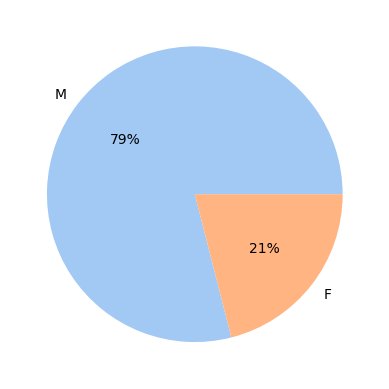

FastingBS
FastingBS
0    0.766885
1    0.233115
Name: proportion, dtype: float64


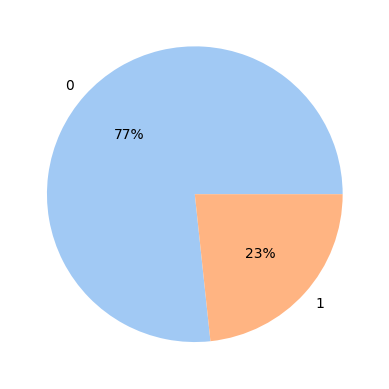

ExerciseAngina
ExerciseAngina
N    0.595861
Y    0.404139
Name: proportion, dtype: float64


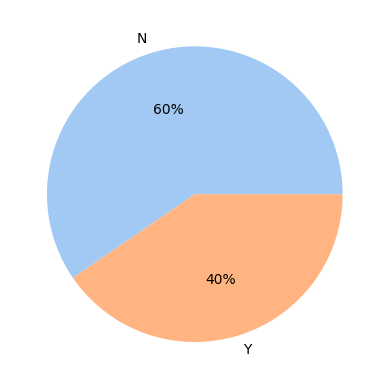

HeartDisease
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


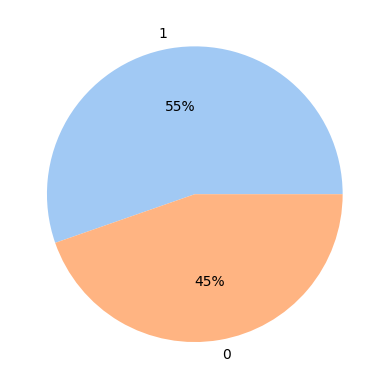

In [45]:
for i in Binary_cols:
    print(i)
    answ = df[i].value_counts(normalize=True)
    print(answ)
    colors = sns.color_palette('pastel')[0:2]
    plt.pie(df[i].value_counts(normalize=True), labels = answ.index, colors = colors, autopct='%.0f%%')
    plt.show()

The initial part of analysis we can accomplish with the investigation of distribution of different non-binary features:   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


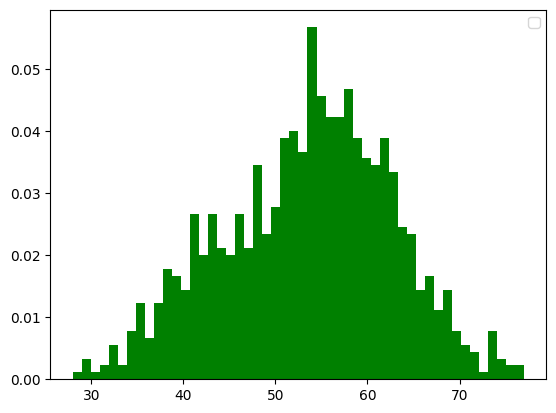

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


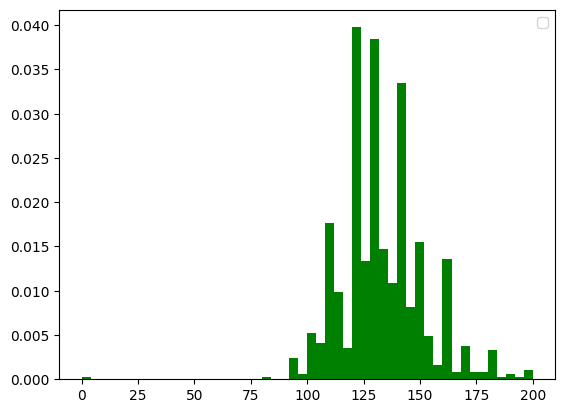

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


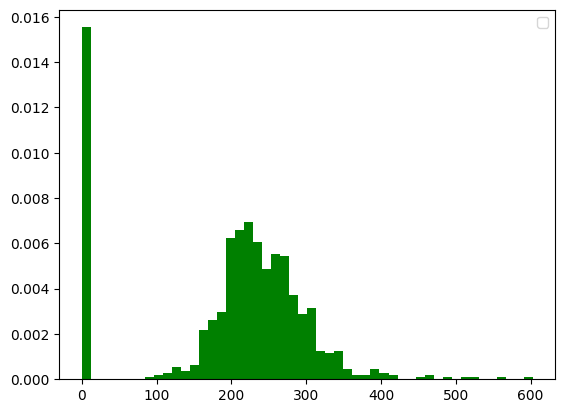

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


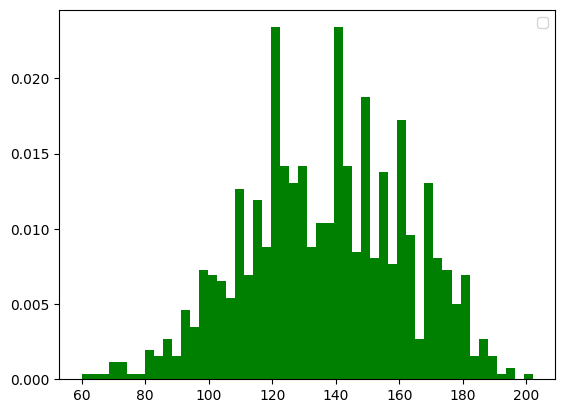

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


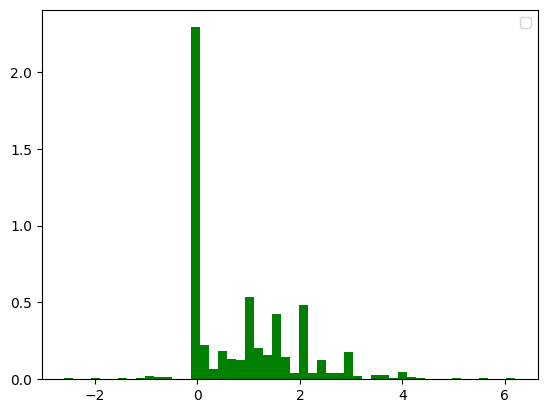

In [55]:
cont_cols = ['Age'	,'RestingBP',	'Cholesterol',	'MaxHR' ,'Oldpeak']
k=0
for i in cont_cols:
    plt.hist(df[i], 50, density = True, 
         histtype ='bar',
         color = 'green')
 
    plt.legend(prop ={'size': 10})
 
 
    plt.show()
    k+=1

## Multivariate data analysis

In [56]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='RestingBP', ylabel='Age'>,
        <Axes: xlabel='Cholesterol', ylabel='Age'>,
        <Axes: xlabel='MaxHR', ylabel='Age'>,
        <Axes: xlabel='Oldpeak', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='RestingBP'>,
        <Axes: xlabel='RestingBP', ylabel='RestingBP'>,
        <Axes: xlabel='Cholesterol', ylabel='RestingBP'>,
        <Axes: xlabel='MaxHR', ylabel='RestingBP'>,
        <Axes: xlabel='Oldpeak', ylabel='RestingBP'>],
       [<Axes: xlabel='Age', ylabel='Cholesterol'>,
        <Axes: xlabel='RestingBP', ylabel='Cholesterol'>,
        <Axes: xlabel='Cholesterol', ylabel='Cholesterol'>,
        <Axes: xlabel='MaxHR', ylabel='Cholesterol'>,
        <Axes: xlabel='Oldpeak', ylabel='Cholesterol'>],
       [<Axes: xlabel='Age', ylabel='MaxHR'>,
        <Axes: xlabel='RestingBP', ylabel='MaxHR'>,
        <Axes: xlabel='Cholesterol', ylabel='MaxHR'>,
        <Axes: xlabel='MaxHR', ylabel='MaxHR'>,
       

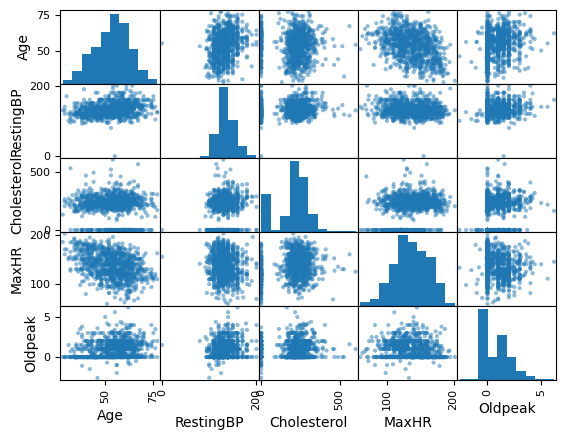

In [58]:
df_cont = df[cont_cols]
pd.plotting.scatter_matrix(df_cont, alpha=0.5)

This data was visualised not very clear that is why i've found another way to demonstrate relatioships between different features, but firstly, i decided to normalise my data:

In [92]:
normal_df=df_cont.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

<Figure size 800x640 with 0 Axes>

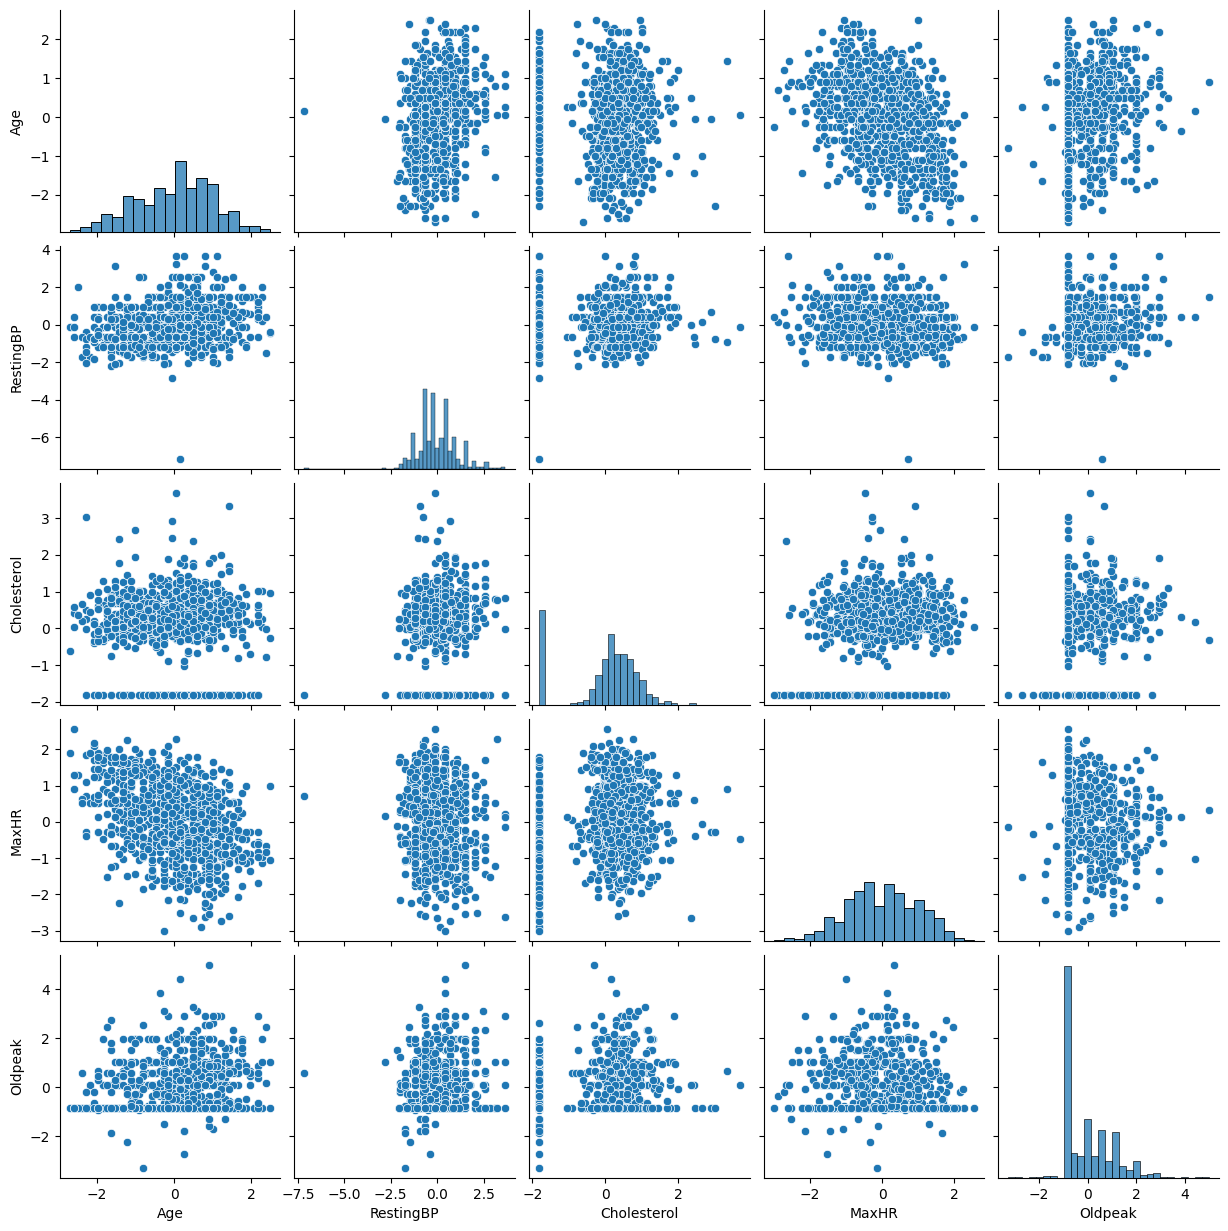

In [93]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(normal_df, kind="scatter")
plt.show()

I found that Cholesterol and Oldpeak have a strange amount of zero variables. It can point that missing variable were assigned zero. If i can understand that oldpeak can be equal zero, however cholesterol - not. And this plot can help us to understand that is a outliers.

Here we can see only one strong correlation: between MaxHR and Age.

In [94]:
normal_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,0.051853,0.950812,-0.034736,-0.581664,-0.831979
...,...,...,...,...,...
913,-0.902283,-1.209697,0.596068,-0.188897,0.293123
914,1.536064,0.626736,-0.053020,0.164595,2.355810
915,0.369898,-0.129442,-0.619830,-0.856602,0.293123
916,0.369898,-0.129442,0.340090,1.460728,-0.831979


I decided to check my hypotheses:

<Axes: xlabel='Age'>

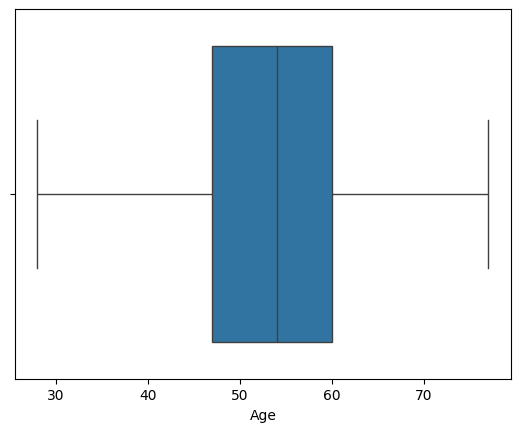

In [96]:
sns.boxplot(df, x="Age")

<Axes: xlabel='RestingBP'>

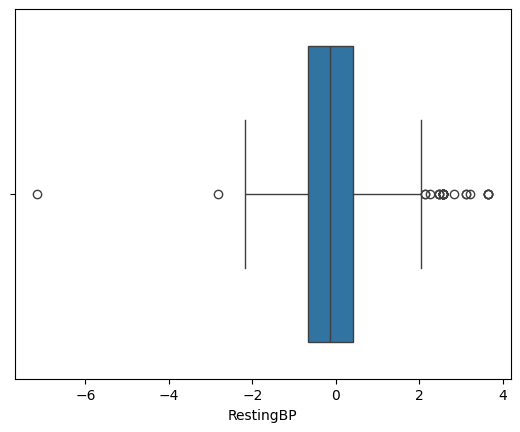

In [98]:
sns.boxplot(normal_df, x="RestingBP")

<Axes: xlabel='RestingBP'>

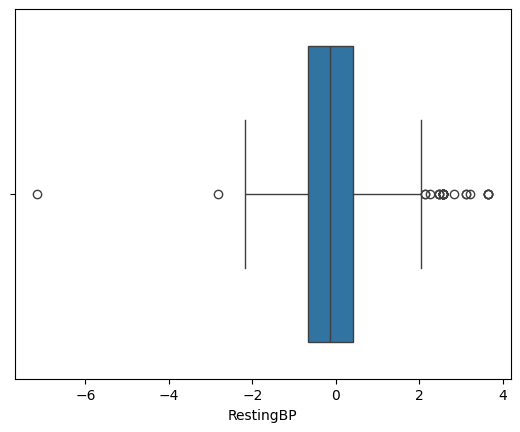

In [99]:
sns.boxplot(normal_df, x="RestingBP")


<Axes: xlabel='Cholesterol'>

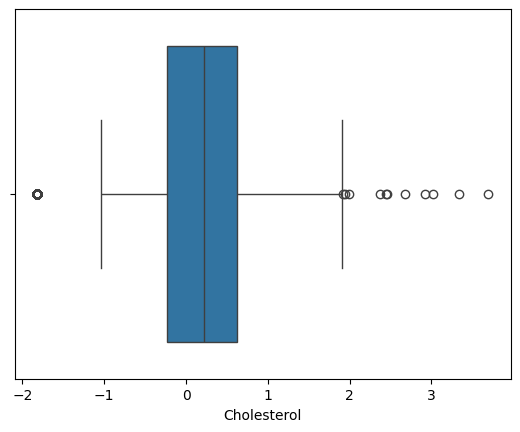

In [100]:
sns.boxplot(normal_df, x="Cholesterol")

<Axes: xlabel='MaxHR'>

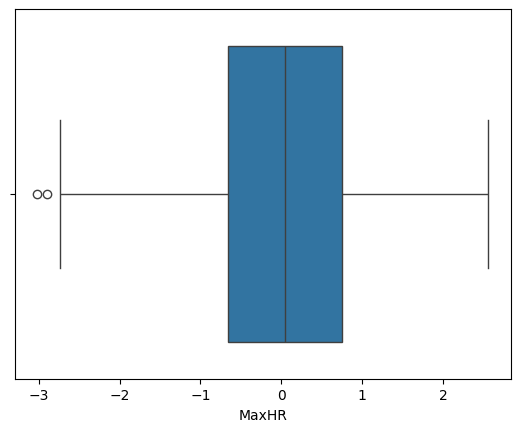

In [101]:
sns.boxplot(normal_df, x="MaxHR")


<Axes: xlabel='Oldpeak'>

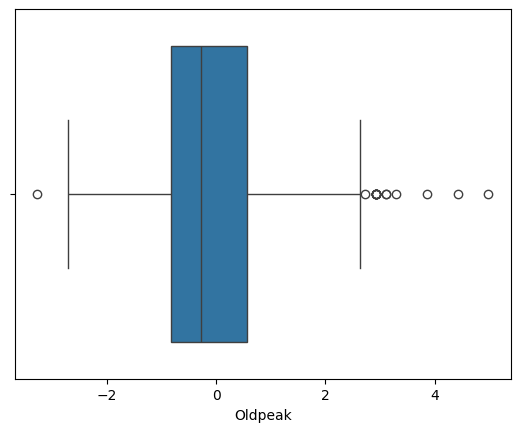

In [102]:
sns.boxplot(normal_df, x="Oldpeak")

Oldpeak doesn't have outliers in the first position, Cholosterol - does.


Checking correlations:

In [77]:
from scipy.stats import shapiro

In [103]:
for i in normal_df.columns:
  print(shapiro(normal_df[i]), i)
  res = shapiro(normal_df[i])
  if res[1] > 0.05:
    print("Normal distribution!", end = "\n\n")
  else:
    print("Non-normal distribution", end = "\n\n")

ShapiroResult(statistic=0.9910140037536621, pvalue=2.1699475837522186e-05) Age
Non-normal distribution

ShapiroResult(statistic=0.9580429196357727, pvalue=1.494997270036079e-15) RestingBP
Non-normal distribution

ShapiroResult(statistic=0.8705925941467285, pvalue=6.972955704658339e-27) Cholesterol
Non-normal distribution

ShapiroResult(statistic=0.9926716089248657, pvalue=0.00016828320804052055) MaxHR
Non-normal distribution

ShapiroResult(statistic=0.8598769903182983, pvalue=8.269153549921592e-28) Oldpeak
Non-normal distribution



We can see that our data has outliers and non-normal distribution, that is why we need to use a non-parametric correlation  coefficient like the spearman test

<Axes: >

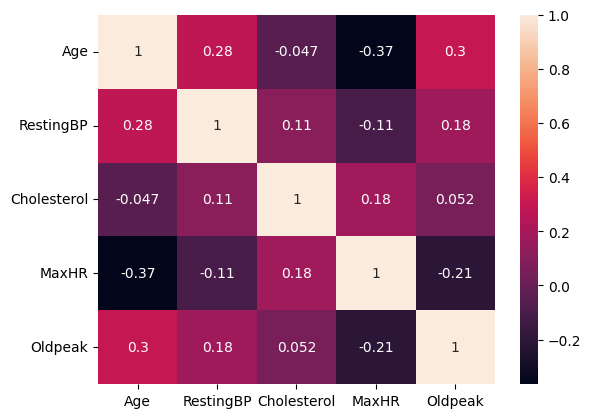

In [104]:
sns.heatmap(normal_df.corr(method='spearman'), annot = True)

Age/MaxHR and Age/Oldpeak have the strongest negative and positive correlations, respectively.

## Histograms with the probability of heart disease

In [117]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


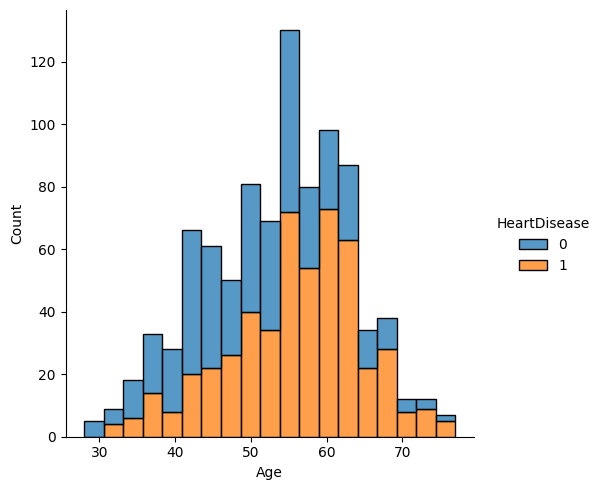

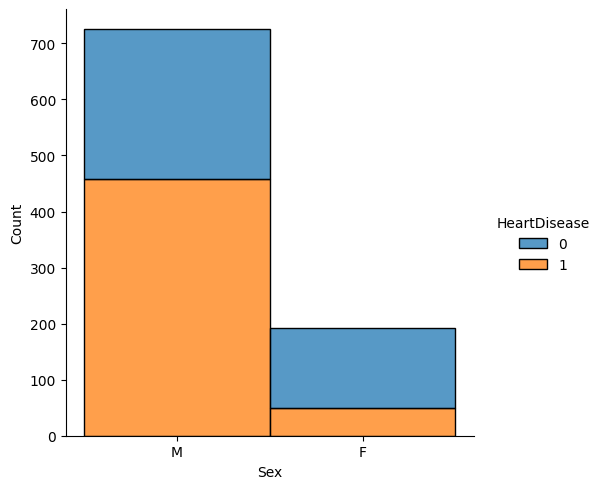

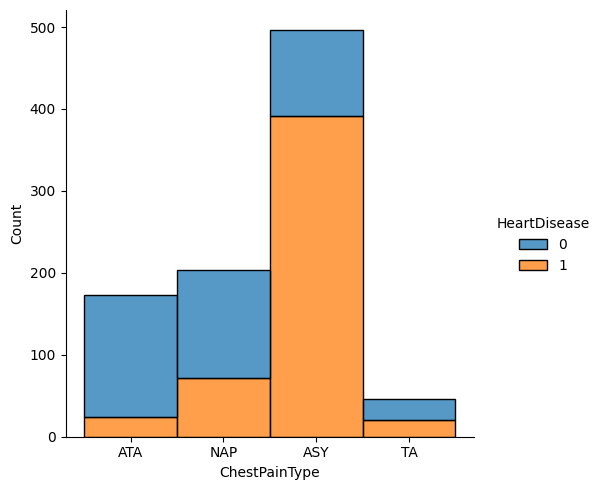

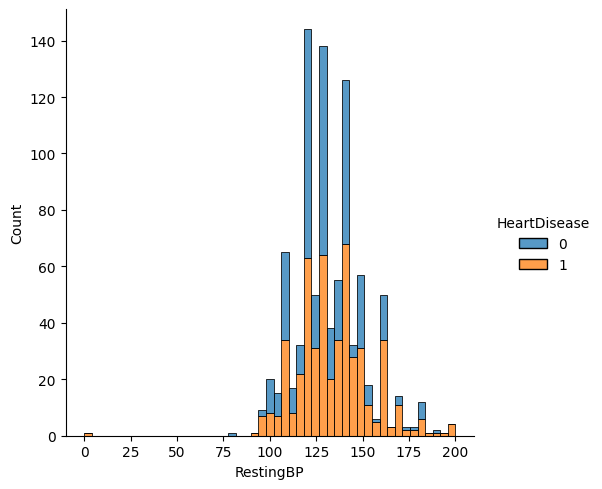

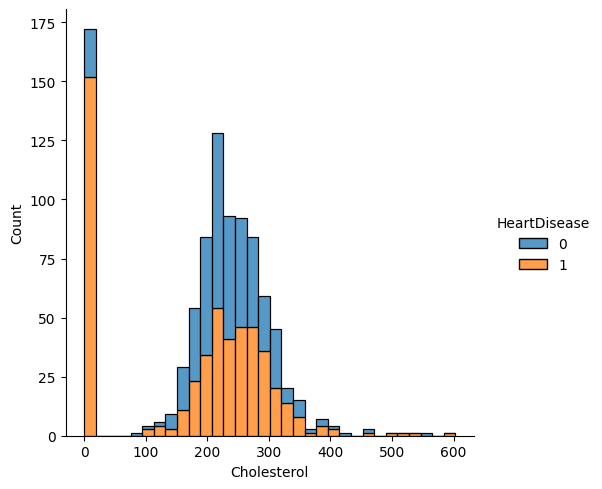

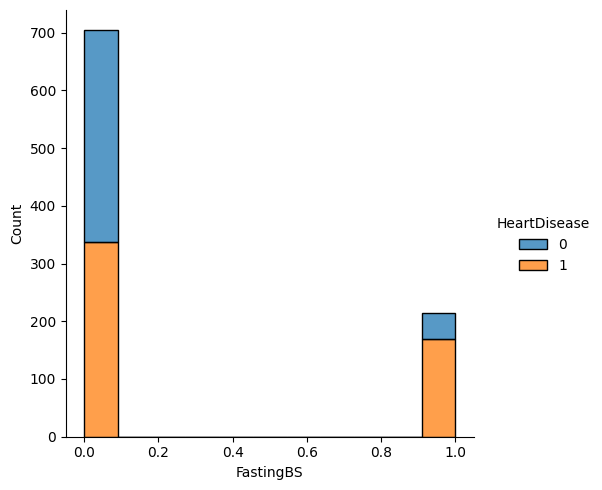

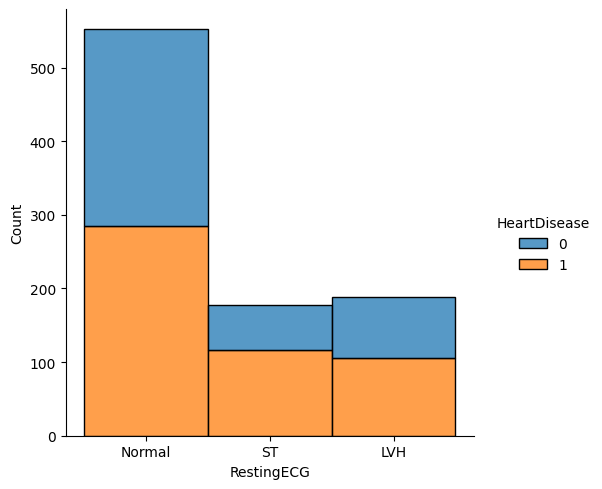

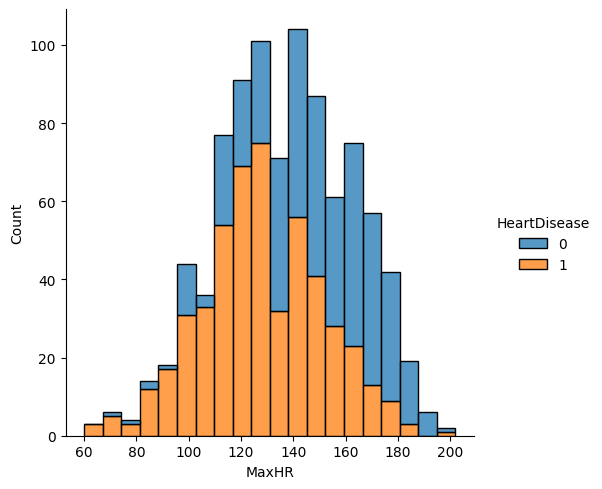

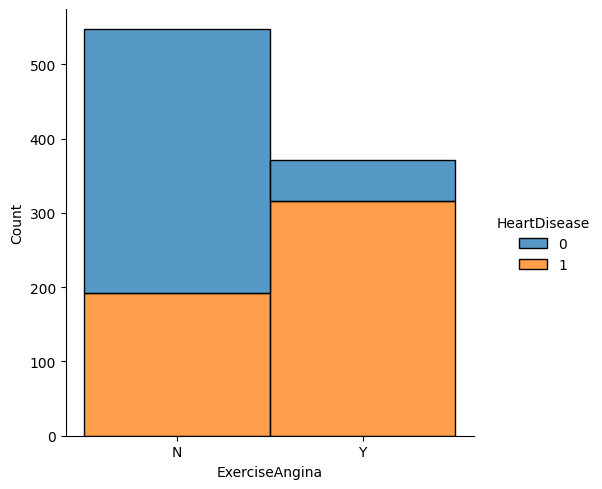

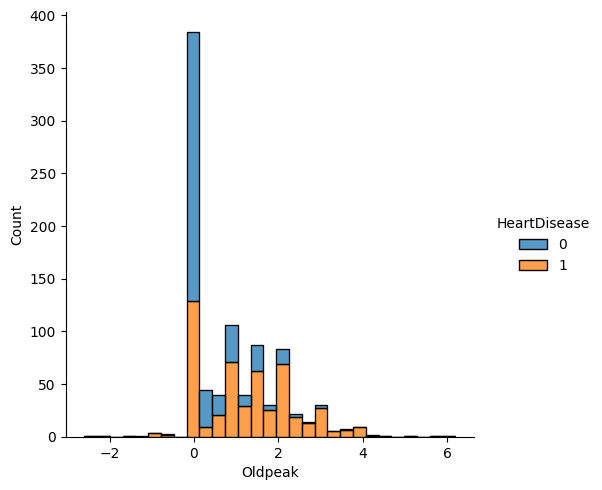

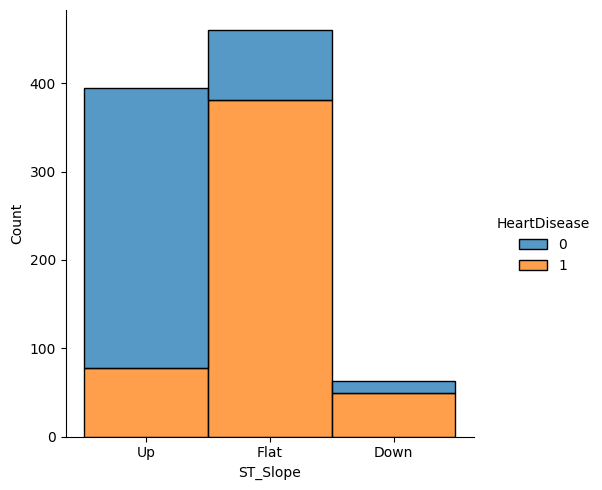

In [124]:
for i in df.columns[:-1]:
    sns.displot(df, x=i, hue="HeartDisease", multiple="stack")


## Possible feature engineering or variable encoding

For different tests(Machine Learning) in futher work with this dataset we may need the next format of columns: 

In [111]:
from sklearn.preprocessing import OneHotEncoder

categ_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
OneHotencoder = encoder.fit_transform(df[categ_columns])

one_hot_df = pd.DataFrame(OneHotencoder, columns=encoder.get_feature_names_out(categ_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)


df_encoded = df_encoded.drop(categ_columns, axis=1)

df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Also we got normilised data during EDA and can save them in our final data frame.

In [114]:
df_final = df_encoded
for i in normal_df:
    df_final[i] = normal_df[i]

In [115]:
df_final.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432359,0.410685,0.824621,0,1.382175,-0.831979,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478223,1.490940,-0.171867,0,0.753746,0.105606,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.750404,-0.129442,0.769768,0,-1.524307,-0.831979,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.584238,0.302660,0.138964,0,-1.131539,0.574398,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051853,0.950812,-0.034736,0,-0.581664,-0.831979,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Conclusions

The most important information was got when i drew histograms with the probability of heart disease, so we can see that increasing/decreasing parameters or different states(categorical feature) can impact on the presence or absence of a heart disease.
We can also explore the relationships between features using correlation coefficients and define their interaction (collinear(e.g. weak correlation - Age/Oldpeak) or otherwise).